# Data Analysis Task 1
### Jake Holden

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split

sns.set(style='whitegrid', font_scale=1.5)
%matplotlib inline

In [56]:
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df['Gender'] = df['Gender'].astype('category')

index_map = {0:'Extremely Weak', 1:'Weak', 2:'Normal', 3:'Overweight', 4:'Obesity', 5:'Extreme Obesity'}
# df['Index'] = df['Index'].map(index_map).astype("category")
df['Index'] = df['Index'].astype("category")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [57]:
df.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


## Data Exploration

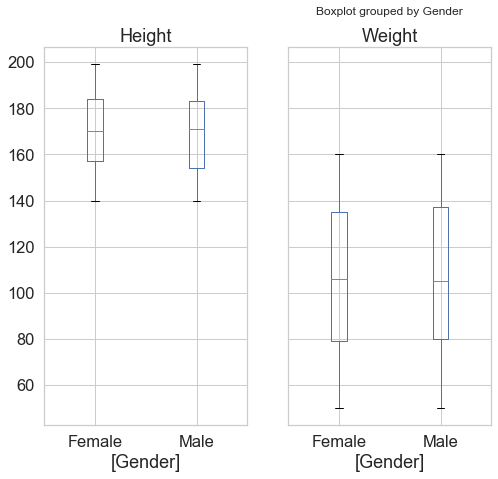

In [80]:
df.boxplot(by='Gender', layout=(1,3), figsize=(12,7));

The boxplot shows no obvious correlation between gender and height/weight. In many datasets, males are on average slightly taller and slightly heavier than females. This suggests that a more rigorous exploration of the body index category in this data is necessary.

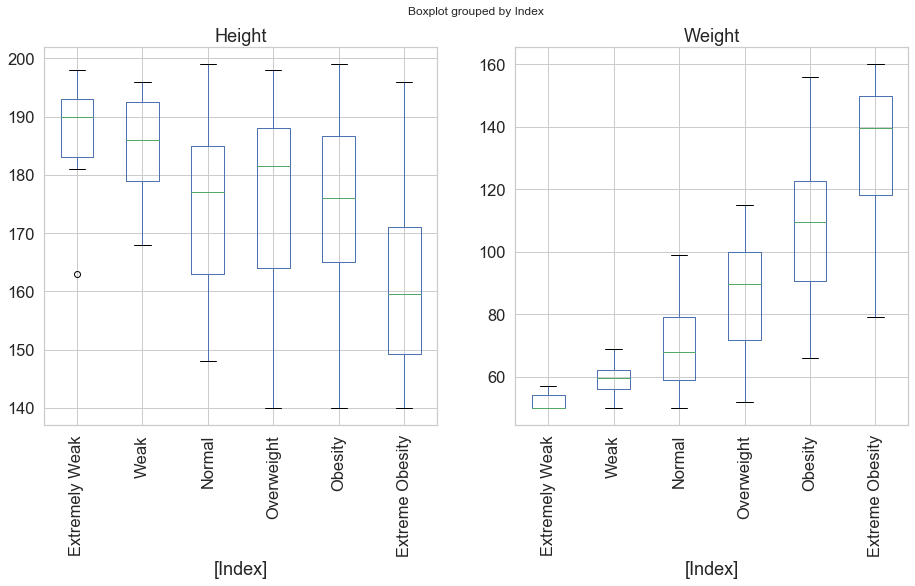

In [73]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
df.boxplot(by='Index', layout=(1,2), rot=90, ax=ax);
ax[0].set_xticklabels(list(index_map.values()));
ax[1].set_xticklabels(list(index_map.values()));

Here we see a clear correlation between body index and weight which is expected, but also a meaningful correlation with height which is somewhat surprising. The median height for people experiencing obesity and extreme obesity is shorter than other body indices. These correlations suggest that this dataset is well suited to train both a classifier that identifies a person's body index based on height and weight (to be determined if gender is necessary) and a regressor to determine a person's height or weight if given their body index and height/weight (whichever is not the target).

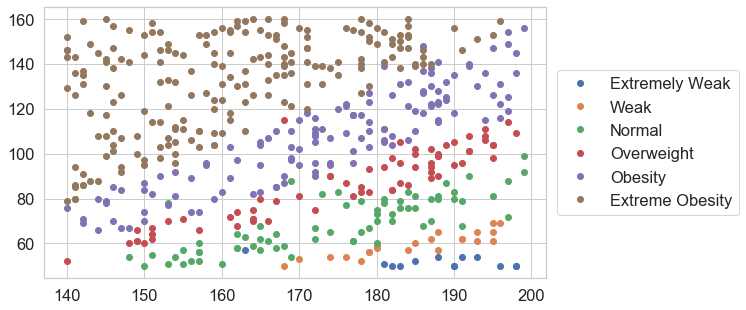

In [106]:
plt.subplots(figsize=(9,5))

groups = df.groupby("Index")
for name, group in groups:
    plt.plot(group["Height"], group["Weight"], marker="o", linestyle="", label=index_map[name])
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5))

We see a distinct correlation between height and weight when disaggregated by body index with an unbounded upper limit on weight for a given height for the "Extreme Obesity" category.

## Model Development

### Train

In [ ]:
gender_map = {'Male':0, 'Female':1}
df.Gender = df.Gender.map(gender_map)

In [123]:
X = df[['Gender','Height','Weight']]
y = df['Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [124]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [125]:
clf.predict([[0, 180, 80]])

array([2])

In [126]:
clf.score(X_test, y_test)

0.92